# Линейная регрессия


Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ \hat{y} = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где $\hat{y}$ - целевая переменная (что мы хотим предсказать), $x_i$ - i-ый признак объекта $x$, $w_i$ - вес $i$-го признака, $b$ - bias (смещение, свободный член).

В задаче линейной регрессии $\hat{y}$ - это действительное число.

Часто для упрощения записи вводят дополнительный фиктивный признак $x_0$, который всегда равен 1, тогда bias - вес этого признака. В этом случае формула может быть записана как скалярное произведение:
$$ \hat{y} = <w, x> $$

В матричной форме формулу можно переписать следующим образом:
$$ \hat{y} = Xw,$$
$\hat{y}$ - вектор значений целевой переменной размера $n$, $X$ - матрица значений признаков объектов размера $n \times k$, w - вектор весов размера $k$. То есть в наших данных имеется $n$ объектов, каждый их которых описан $k$ признаками.

Таким образом, в матричной форме модель задаётся следующим образом:
$$ y = Xw + \epsilon$$ 

Важно отметить, что параметрами этой модели являются веса $w$. Когда говорят об обучении какого-либо алгоритма машинного обучения, как правило, имеют в виду настройку весов, т.е. параметров модели.  

На практике $\hat{y} $ может отличается от реальных значений, которые принимает целевая переменная $y$. Разницу между реальным значением и предсказанным, обозначим как $\epsilon$ - вектор значений случайной переменной, соответствующая случайной, непрогнозируемой ошибке модели. Ограничения, которые накладываются на эту модель:
* математическое ожидание случайных ошибок $\epsilon$ равно нулю,
* дисперсия случайных ошибок одинакова и конечна,
* случайные ошибки не скоррелированы.

Один из способов вычислить значения параметров модели, давно знаком - это наименьших квадратов, который минимизирует среднеквадратичную ошибку между реальным значением зависимой переменной и прогнозом, выданным моделью. Решение по методу наименьших квадратов дает:
$$ w = (X^TX)^{-1}X^TY $$

Загрузим необходимые библиотеки

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Оценка результатов

Чтобы оценить качество работы алгоритма нам необходимо применяют разные метрики. Наиболее частые метрики средневадратичная и средняя абсолютная ошибки. Вычислим эти метрики на обучающей и на тестовой выборках. 

 * *mean_absolute_error* - средняя абсолютная ошибка $|y_i - \hat{y}_i|$
 * *mean_squared_error* - средняя квадратичная ошибка $(y_i - \hat{y}_i)^2$

## Задание 3.1

Пример 1. Сгенерируем искусственные данные. Сначала поработаем с простейшим одномерным случаем, когда у нас значение $y$ будет зависеть только от одного значения $x$.




In [ ]:
def generate_data(n_points=20):
  X = np.linspace(-5, 5, n_points)
  y = 10 * X - 7

  X_train = X[0::2].reshape(-1, 1)
  y_train = y[0::2] + np.random.randn(int(n_points/2)) * 10

  X_test = X[1::2].reshape(-1, 1)
  y_test = y[1::2] + np.random.randn(int(n_points/2)) * 10

  print(f'Generated {len(X_train)} train samples and {len(X_test)} test samples')
  return X, X_train, y_train, X_test, y_test

In [ ]:
X, X_train, y_train, X_test, y_test = generate_data(100)

Generated 50 train samples and 50 test samples


In [ ]:
### Реализуйте настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE. Сравните с результатами из sklearn

def train(train_X, train_Y):
  X1 = np.insert(train_X, 1, 1, axis=1) # (50, 2)
  weight , bias    = np.linalg.inv((X1.T).dot(X1)).dot((X1.T).dot(train_Y))
  return np.array([weight]), bias


def mse(true, pred):    
    return np.mean((true - pred)**2)

def mae(true, pred):    
    return np.mean(np.abs(true - pred))





w=  [10.07188223]
b=  -9.436330851340248 

Свои методы	

MSE_train=  94.53526075326852 

MSE_test=  76.12977450127045 

MAE_train=  7.359808611500707 

MAE_test=  7.614061242816124 



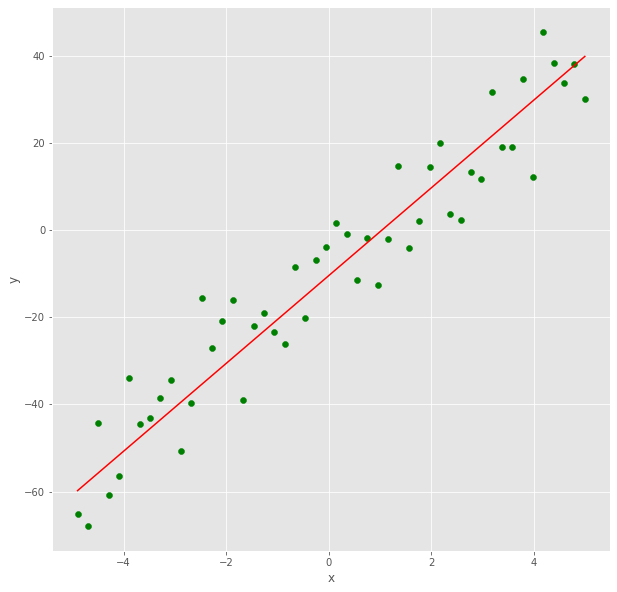

In [ ]:
w , b = train(X_train,y_train)
print('w= ',w)
print('b= ',b,'\n')
print("Свои методы\t\n")
Y_train_predicted = X_train.dot(w) + b
#print('Y_train_predicted= ',Y_train_predicted,'\n')
print('MSE_train= ',mse(y_train,Y_train_predicted),'\n')


Y_test_predicted = X_test.dot(w) + b
#print('Y_train_predicted= ',Y_test_predicted,'\n')
print('MSE_test= ',mse(y_test,Y_test_predicted),'\n')

print('MAE_train= ',mae(y_train,Y_train_predicted),'\n')
print('MAE_test= ',mae(y_test,Y_test_predicted),'\n')

#####################################################################
plt.figure(figsize=(10, 10))
plt.scatter(X_test, y_test, color='green')
#plt.plot(X, Y, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(X_test, Y_train_predicted, color='red')
plt.show() 

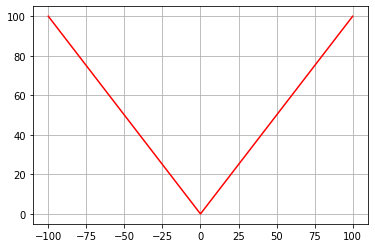

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# MAE loss function
def mae_loss(Y_test_predicted,y_test):
    abs_error = np.abs(Y_test_predicted - y_test)
    sum_abs_error = np.sum(abs_error)
    loss = sum_abs_error / y_test.size
    return loss
    
# Plotting
x_vals = np.arange(-100, 100, 0.01)
y_vals = np.abs(x_vals)

plt.plot(x_vals, y_vals, "red")
plt.grid(True, which="major")
plt.show()

In [ ]:

print('MAE_train= ',mae(y_train,Y_train_predicted),'\n')
print('MAE_test= ',mae(y_test,Y_test_predicted),'\n')

MAE_train=  7.671257392930064 

MAE_test=  8.042461931846962 



In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

w = model.coef_
b = model.intercept_


print('w= ',w)
print('b= ',b)

w=  [9.16689883]
b=  -5.37453129441903


In [ ]:
from sklearn.metrics import mean_squared_error

y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

print('Train MSE: ', mean_squared_error(y_train, y_train_predicted))
print('Test MSE: ', mean_squared_error(y_test, y_test_predicted))

Train MSE:  87.40250964717586
Test MSE:  99.06371411625717


In [ ]:
 from sklearn.metrics import r2_score
 r2_score(y_test, y_test_predicted )

0.8815257916672858

In [ ]:
from sklearn.metrics import mean_absolute_error

print('Train MAE: ', mean_absolute_error(y_train, y_train_predicted))
print('Test MAE: ', mean_absolute_error(y_test, y_test_predicted))

Train MAE:  7.671257392930064
Test MAE:  8.042461931846962


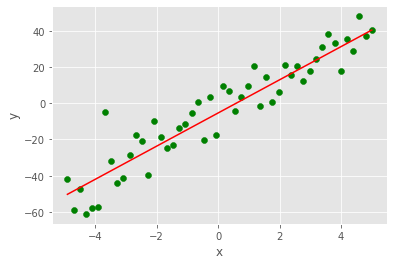

In [ ]:
#############################################################
plt.scatter(X_test, y_test,color='green')
plt.plot(X_test, y_test_predicted, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Задание 3.2

Пример 2. Не всегда в задаче регрессии в качестве решения выступает прямая, как в предыдущем случае. Рассмотрим ещё один пример, в котором у объектов всё ещё один признак. Но теперь мы будм брать случайную точку на синусоиде и добавлять к ней шум — таким образом получим целевую переменную, признаком в этом случае будет координата $x$.

In [ ]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # выберем некоторое количество точек из промежутка от 0 до 2*pi
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # для каждой посчитаем значение sin(x) + 1
    # это будет ground truth
    data['values'] = np.sin(data['support']) + 1
    # из support посемплируем некоторое количество точек с возвратом, это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # опять посчитаем sin(x) + 1 и добавим шум, получим целевую переменную
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data
data = generate_wave_set(1000, 250)
data

In [ ]:
### попробуйте реализовать настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE

In [ ]:
data['x_train'] = data['x_train'].reshape(-1,1)


#data['x_train']
#print(data['y_train'])
w2 , b2 = train(data['x_train'],data['y_train'])
print('w= ',w)
print('b= ',b,'\n')
Y_train_predicted = data['x_train'].dot(w2) + b2
#print('Y_train_predicted= ',Y_train_predicted,'\n')
print('MSE_train= ',mse(data['y_train'],Y_train_predicted),'\n')
print('MAE_train= ',mae(data['y_train'],Y_train_predicted),'\n')


w=  [9.16689883]
b=  -5.37453129441903 

MSE_train=  0.2627636673777117 

MAE_train=  0.42844850380534527 



In [ ]:
#from sklearn.metrics import r2_score
#print('r2_score= ',r2_score(data['y_train'], Y_train_predicted ))

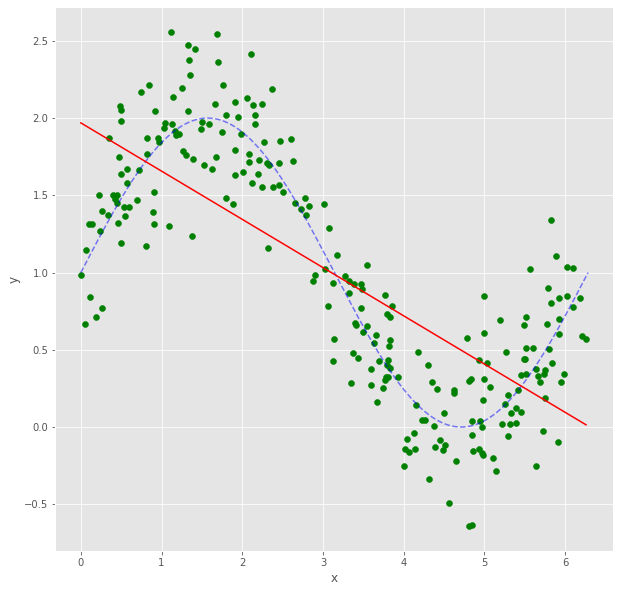

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(data['x_train'], data['y_train'], color='green')
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(data['x_train'], Y_train_predicted, color='red')
plt.show() # Видно что граффики почти идеально совпадают

Конечно, такое решение нас вряд ли может устроить. Нужно применить полинимиальную регрессию. Идея здесь такая. Каждый признак в исходную формулу может входить не только в первой степени, но и во второй, в третьей и так далее. То есть для случая, когда у нас только один признак:
$$ \hat{y} = w_1 x_1 + w_2 x_1^2 + ... + w_k x_1^k + b,$$ 

## Задание 3.3

Train MSE:  0.5724899539866771
Test MSE:  0.6927126216376177


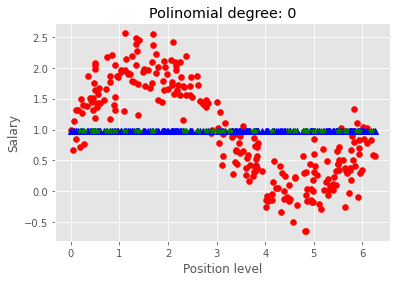

Train MSE:  0.24170911713766963
Test MSE:  0.34715601104853283


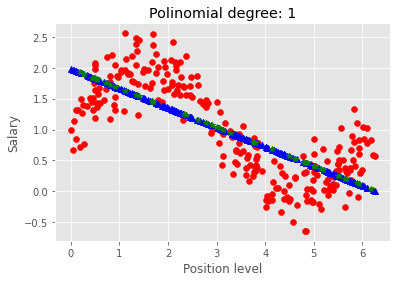

Train MSE:  0.2412361063809285
Test MSE:  0.3506791909282069


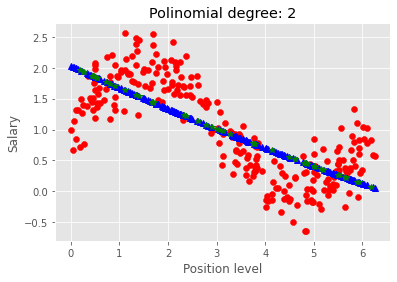

Train MSE:  0.07801199003613916
Test MSE:  0.1460354106363568


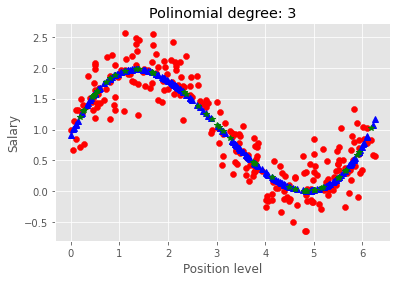

Train MSE:  0.0778558782589409
Test MSE:  0.1440684374346239


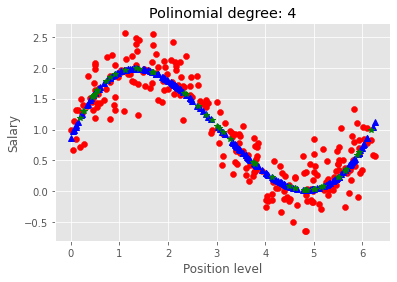

Train MSE:  0.07218455973890514
Test MSE:  0.13975387134605652


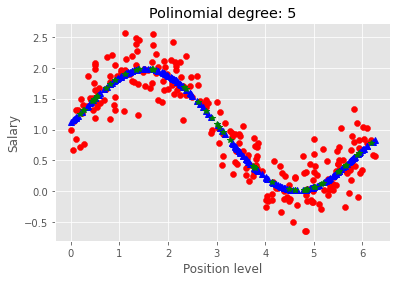

Train MSE:  0.07017817483711355
Test MSE:  0.14679305384528546


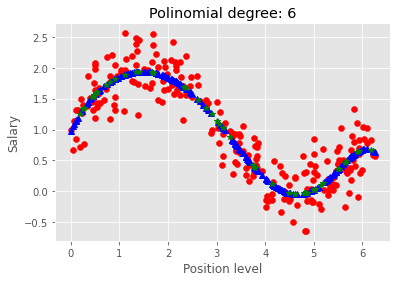

Train MSE:  0.06981870195204772
Test MSE:  0.14729440695987817


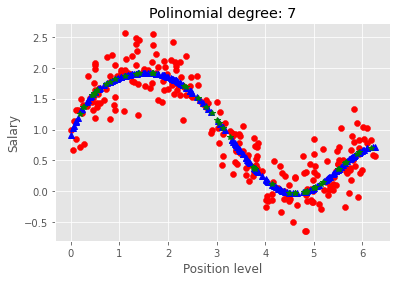

Train MSE:  0.06965461312391608
Test MSE:  0.1479349304740927


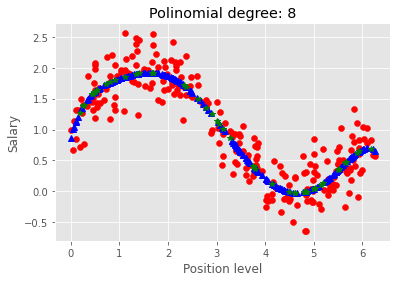

Train MSE:  0.06964488478225095
Test MSE:  0.1481130898259245


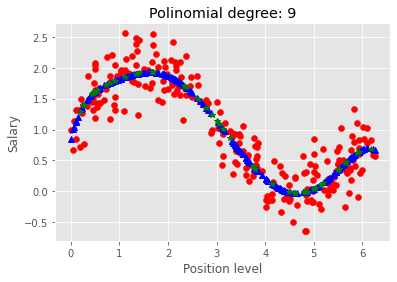

Train MSE:  0.06963440262575815
Test MSE:  0.1478980414532004


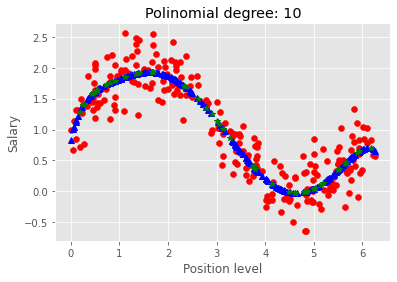

Train MSE:  0.06956981593240105
Test MSE:  0.14672869316166148


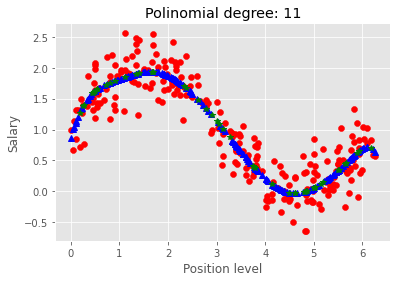

Train MSE:  0.0692514685964465
Test MSE:  0.14781988942382188


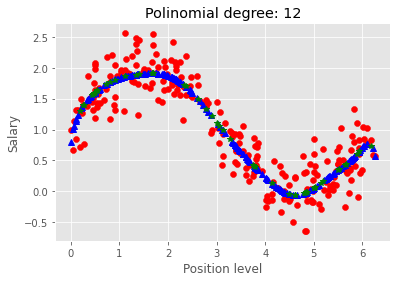

Train MSE:  0.06917619781130661
Test MSE:  0.14721854153802516


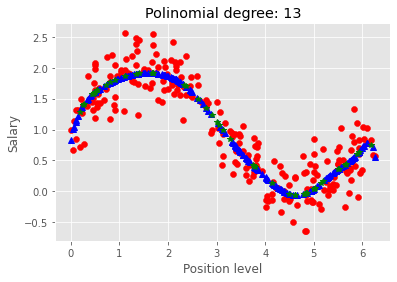

Train MSE:  0.06894668598777831
Test MSE:  0.14526472704831608


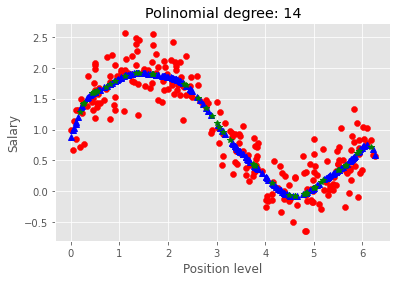

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
### Реализуйте полиномиальную регрессию. Сделайте визуализацию для полиномов разных степеней. 
### Полином какой степени подходит больше других? Почему?
def build_model(n):
  Y = data['y_train'].reshape(-1,1)
  X = data['x_train'].reshape(-1,1)

  X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state=42 ) 

  pf = PolynomialFeatures(degree=n)
  X_poly_train = pf.fit_transform(X_train)
  X_poly_test = pf.fit_transform(X_test)
  model = LinearRegression()
  model.fit(X_poly_train, y_train)


  Y_poly_predicted_train = model.predict(X_poly_train)
  Y_poly_predicted_test = model.predict(X_poly_test)
  
  

  print('Train MSE: ', mean_squared_error(y_train, Y_poly_predicted_train))
  print('Test MSE: ', mean_squared_error(y_test, Y_poly_predicted_test))

  def viz_polymonial():
      plt.scatter(X, Y, color='red')
      plt.plot(X_train,Y_poly_predicted_train, color='blue',linestyle = 'None',marker='^')
      plt.plot(X_test,Y_poly_predicted_test, color='green',linestyle = 'None',marker='*')
      plt.title('Polinomial degree: {}'.format(n))
      plt.xlabel('Position level')
      plt.ylabel('Salary')
      plt.show()
      return
  viz_polymonial()


  
for n in range(15):
  build_model(n)

###Проведя несколько тестов можно увидеть что наилучшими полиномами являются полиномы степери 3, 4, 5. Так как после модель начинает переучиваться и ошибка на тестовых данных растет.

# Реальный датасет

Возьмём реальный набор данных Boston из sklearn.datasets. Этот датасет описывает средние цены на недвижимость в районах Бостона в тысячах долларов.

Примеры признаков объектов недвижимости: количество преступлений на душу населения, процент старых домов в районе, количество учеников на одного учителя и т.д. Обратите внимание на то, что данные уже оцифрованы там, где изначально признаки были качественными.

Загрузим датасет, выведем информацию

In [ ]:
from sklearn.datasets import load_boston


In [ ]:
from sklearn.model_selection import train_test_split
house_data = load_boston()
X_h = pd.DataFrame(house_data['data'], columns=house_data['feature_names'])
Y_h = house_data['target']
X_train,X_test,y_train,y_test = train_test_split(X_h,Y_h)

In [ ]:
##print((X_train))
#print((X_test))
#print(np.shape(y_train))
#print(np.shape(y_test))

In [ ]:
X_h.head(100)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.12204,0.0,2.89,0.0,0.445,6.625,57.8,3.4952,2.0,276.0,18.0,357.98,6.65
96,0.11504,0.0,2.89,0.0,0.445,6.163,69.6,3.4952,2.0,276.0,18.0,391.83,11.34
97,0.12083,0.0,2.89,0.0,0.445,8.069,76.0,3.4952,2.0,276.0,18.0,396.90,4.21
98,0.08187,0.0,2.89,0.0,0.445,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57


## Задание 3.4

In [ ]:
### оставьте в наборе данных только 7 наиболее значимых признаков
### настройте параметры линейной регрессии и сравните метрики качества (MSE и MAE) для полного датасета и усечённого

Train MSE:  20.037601793777565
Test MSE:  28.45325013966342
Train MAE:  3.196551502279228
Test MAE:  3.6779838740633344


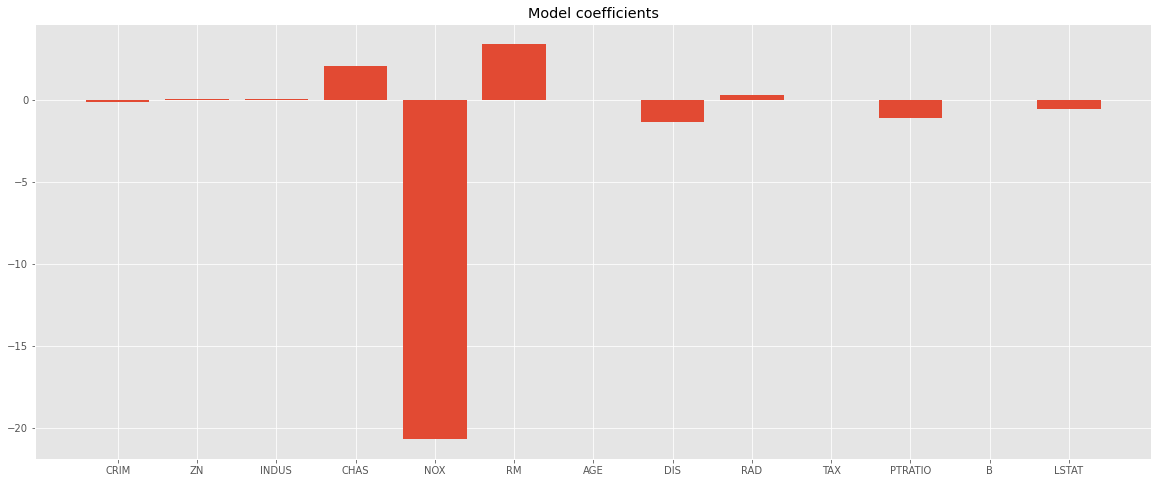

[-9.99726853e-02  4.65481894e-02  2.81952954e-02  2.08351442e+00
 -2.06615041e+01  3.42532602e+00  2.45271190e-02 -1.34792037e+00
  3.06865191e-01 -1.18687078e-02 -1.12437027e+00  8.78188042e-03
 -5.45041065e-01]


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model = LinearRegression()

model.fit(X_train, y_train)

y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)
print('Train MSE: ', mean_squared_error(y_train, y_train_predicted))
print('Test MSE: ', mean_squared_error(y_test, y_test_predicted))

print('Train MAE: ', mean_absolute_error(y_train, y_train_predicted))
print('Test MAE: ', mean_absolute_error(y_test, y_test_predicted))

plt.figure(figsize=(20, 8))
plt.bar(X_h.columns, model.coef_)
plt.title('Model coefficients')
plt.show()
print(model.coef_)

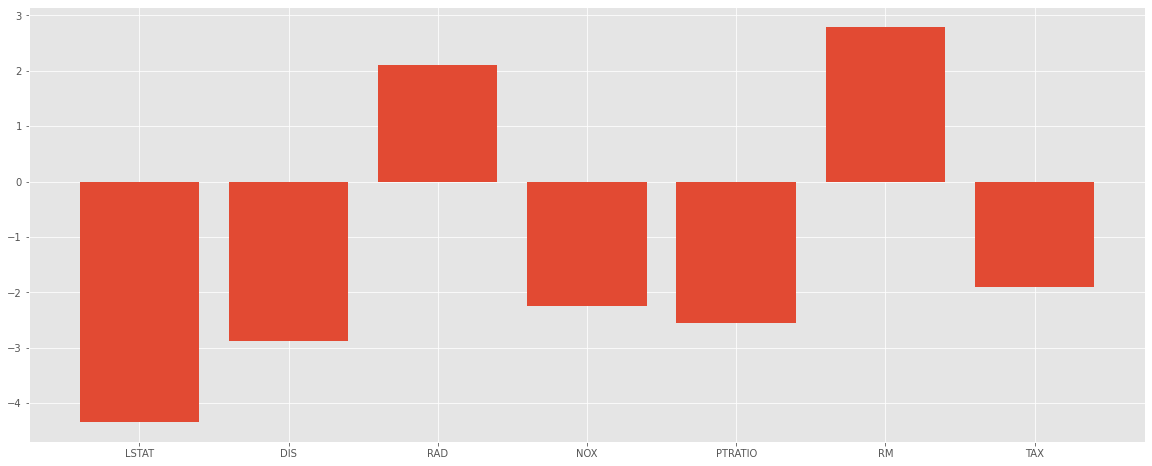

Train MSE:  24.426863394075877
Test MSE:  23.311311460738516
Train MAE:  3.559193899315763
Test MAE:  3.604017598794387


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()

model.fit(X_train, y_train)

y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

plt.figure(figsize=(20, 8))
plt.bar(X_h.columns, model.coef_)
plt.show()

print('Train MSE: ', mean_squared_error(y_train, y_train_predicted))
print('Test MSE: ', mean_squared_error(y_test, y_test_predicted))

print('Train MAE: ', mean_absolute_error(y_train, y_train_predicted))
print('Test MAE: ', mean_absolute_error(y_test, y_test_predicted))

7 самых значимых признаков
Train MSE:  24.426863394075877
Test MSE:  23.311311460738512
Train MAE:  3.559193899315763
Test MAE:  3.604017598794388


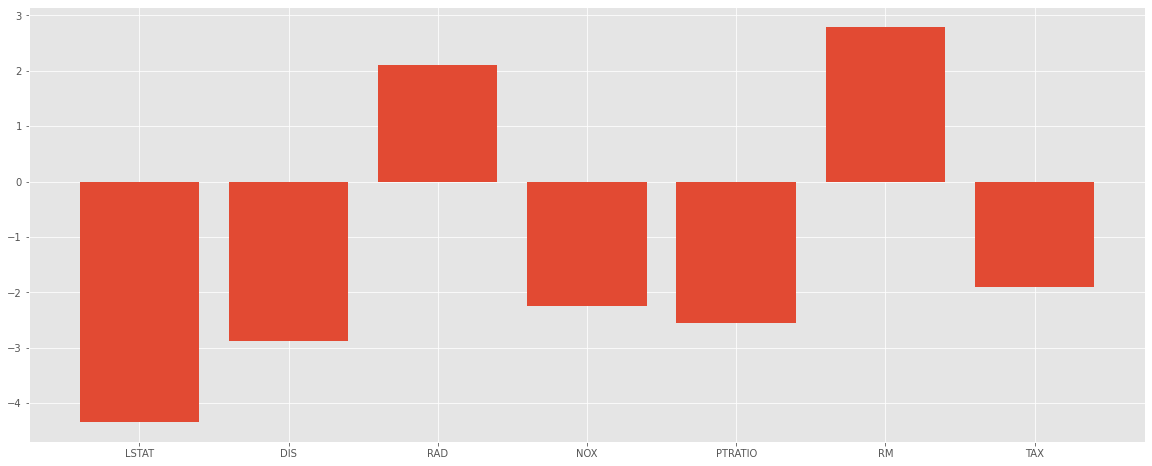

In [ ]:
d = {"coefs": model.coef_, "feature": X_h.columns}
coef_feature = pd.DataFrame(data=d)
coef_feature = coef_feature.iloc[(-np.abs(coef_feature["coefs"].values)).argsort()].head(7)

X_h = X_h[coef_feature["feature"]]

X_train, X_test, y_train, y_test = train_test_split(X_h, Y_h)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

plt.figure(figsize=(20, 8))
plt.bar(X_h.columns, model.coef_)

print('7 самых значимых признаков')
print('Train MSE: ', mean_squared_error(y_train, y_train_predicted))
print('Test MSE: ', mean_squared_error(y_test, y_test_predicted))

print('Train MAE: ', mean_absolute_error(y_train, y_train_predicted))
print('Test MAE: ', mean_absolute_error(y_test, y_test_predicted))